<a href="https://colab.research.google.com/github/sydstewart/Orders/blob/main/SydsQu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
# install Pint if necessary

try:
    import pint
except ImportError:
    !pip install pint

In [51]:
# download modsim.py if necessary

from os.path import exists

filename = 'modsim.py'
if not exists(filename):
    from urllib.request import urlretrieve
    url = 'https://raw.githubusercontent.com/AllenDowney/ModSim/main/'
    local, _ = urlretrieve(url+filename, filename)
    print('Downloaded ' + local)

In [52]:
# import functions from modsim

from modsim import *

In [53]:
def make_system(lam, mu):
    """Make a System object.
    
    lam: arrival rate, per minute λ ,  
    mu: service completion rate, per minute
    μ=1/5 , the average number of time steps for each checkout will be 5 minutes
    returns: System object
    """
    # duration is 10 hours, expressed in minutes
    return System(lam=lam, mu=mu, duration=10*60)# Solution goes here
    

In [54]:
import random
random.seed(33)
interarrival_time = 8
service_time = 5

lam = 1 / interarrival_time
mu = 1 / service_time

system = make_system(lam, mu)
show(system)

,value
lam,0.125
mu,0.200
duration,600.000


In [55]:
def update_func1(x, t, system):
    """Simulate one time step.
    
    x: number of people in the shop
    t: time step
    system: System object
    """
    # if there's a customer in service, check if they're done
    if x > 0:
        if flip(system.mu):
            x -= 1
            
    # check for an arrival
    if flip(system.lam):
        x += 1
        
    return x

In [56]:
def run_simulation(system, update_func):
    """Simulate a queueing system.
    
    system: System object
    update_func: function object
    """
    x = 0
    results = TimeSeries()
    results[0] = x
    
    for t in linrange(0, system.duration):
        x = update_func(x, t, system)
        results[t+1] = x
    print(results)
    return results

Time
0      0
1      0
2      0
3      1
4      1
      ..
597    1
598    0
599    0
600    0
601    0
Name: Quantity, Length: 602, dtype: int64


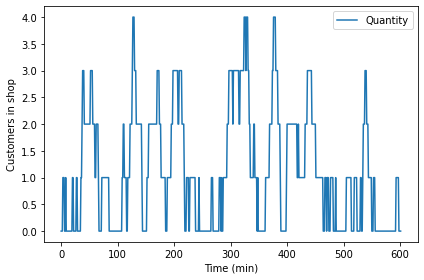

In [57]:
results2 = run_simulation(system, update_func1)
 
results2.plot()
decorate(xlabel='Time (min)', ylabel='Customers in shop')

In [58]:
def compute_metrics(results, system):
    """Compute average number of customers and wait time.
    
    results: TimeSeries of queue lengths
    system: System object
    
    returns: L, W
    """
    L = results.mean()
    W = L / system.lam
    return L, W

In [59]:
L, W = compute_metrics(results2, system)
print('interarrival_time=',interarrival_time)
print('service_time=',service_time)
print('Average number of customers in queue=',round(L,1))
print('Average wait time in queue=', round(W,1), 'mins')

interarrival_time= 8
service_time= 5
Average number of customers in queue= 1.1
Average wait time in queue= 9.0 mins


In [60]:
"""     
    but service 
    lam: arrival rate, per minute
    mu: service completion rate, per minute
    from 10% to 80% of the completion rate,  mu

    interarrival_time = 5
    service_time = 5

    lam = 1 / interarrival_time
    mu = 1 / service_time
"""
num_vals = 101
lam_array = linspace(0.1*mu, 0.8*mu, num_vals)
lam_array

array([0.02  , 0.0214, 0.0228, 0.0242, 0.0256, 0.027 , 0.0284, 0.0298,
       0.0312, 0.0326, 0.034 , 0.0354, 0.0368, 0.0382, 0.0396, 0.041 ,
       0.0424, 0.0438, 0.0452, 0.0466, 0.048 , 0.0494, 0.0508, 0.0522,
       0.0536, 0.055 , 0.0564, 0.0578, 0.0592, 0.0606, 0.062 , 0.0634,
       0.0648, 0.0662, 0.0676, 0.069 , 0.0704, 0.0718, 0.0732, 0.0746,
       0.076 , 0.0774, 0.0788, 0.0802, 0.0816, 0.083 , 0.0844, 0.0858,
       0.0872, 0.0886, 0.09  , 0.0914, 0.0928, 0.0942, 0.0956, 0.097 ,
       0.0984, 0.0998, 0.1012, 0.1026, 0.104 , 0.1054, 0.1068, 0.1082,
       0.1096, 0.111 , 0.1124, 0.1138, 0.1152, 0.1166, 0.118 , 0.1194,
       0.1208, 0.1222, 0.1236, 0.125 , 0.1264, 0.1278, 0.1292, 0.1306,
       0.132 , 0.1334, 0.1348, 0.1362, 0.1376, 0.139 , 0.1404, 0.1418,
       0.1432, 0.1446, 0.146 , 0.1474, 0.1488, 0.1502, 0.1516, 0.153 ,
       0.1544, 0.1558, 0.1572, 0.1586, 0.16  ])

In [61]:
def sweep_lam(lam_array, mu, update_func):
    """Run simulations with a range of values for `lam`
    
    lam: arrival rate, per minute
    mu: service completion rate, per minute

    lam_array: array of values for `lam`
    mu: probability of finishing a checkout
    update_func: passed along to run_simulation
    
    returns: SweepSeries of average wait time vs lam
    """
    sweep = SweepSeries()
    
    for lam in lam_array:
        system = make_system(lam, mu)
        results = run_simulation(system, update_func)
        L, W = compute_metrics(results, system)
        sweep[lam] = W
        
    return sweep

In [62]:
sweep = sweep_lam(lam_array, mu, update_func1)

Time
0      0
1      0
2      0
3      0
4      0
      ..
597    0
598    1
599    1
600    0
601    0
Name: Quantity, Length: 602, dtype: int64
Time
0      0
1      0
2      0
3      0
4      0
      ..
597    0
598    0
599    0
600    0
601    1
Name: Quantity, Length: 602, dtype: int64
Time
0      0
1      0
2      0
3      0
4      0
      ..
597    0
598    0
599    0
600    0
601    0
Name: Quantity, Length: 602, dtype: int64
Time
0      0
1      0
2      0
3      0
4      0
      ..
597    0
598    0
599    0
600    0
601    0
Name: Quantity, Length: 602, dtype: int64
Time
0      0
1      0
2      0
3      0
4      0
      ..
597    1
598    1
599    1
600    1
601    1
Name: Quantity, Length: 602, dtype: int64
Time
0      0
1      0
2      0
3      0
4      0
      ..
597    0
598    0
599    0
600    0
601    0
Name: Quantity, Length: 602, dtype: int64
Time
0      0
1      0
2      0
3      0
4      0
      ..
597    0
598    0
599    0
600    0
601    0
Name: Quantity, Leng

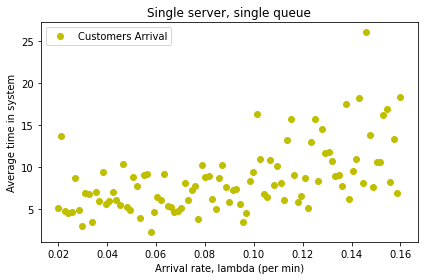

In [63]:
def plot_sweep(sweep):
    sweep.plot(style='yo', label='Customers Arrival')
    
    decorate( 
             ylabel='Average time in system',
             xlabel='Arrival rate, lambda (per min)', 
             title='Single server, single queue')
plot_sweep(sweep)

In [64]:
W_avg = sweep.mean()
print(W_avg)

8.517320966335083


In [65]:
def plot_W(lam_array, mu):
    """Plot the theoretical mean wait time.
    
    lam_array: array of values for `lam`
    mu: probability of finishing a checkout
    n particular, we can derive the average time in the store as a function of  μ  and  λ :
    W=1/(μ−λ)
    """
    W_array = 1 / (mu - lam_array)
    W_series = make_series(lam_array, W_array)
    W_series.plot(style='-', label='analysis')

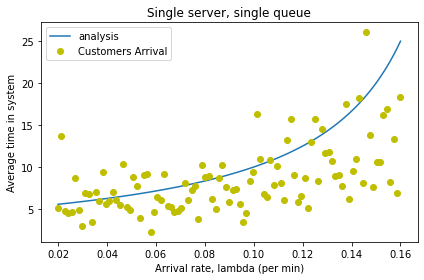

In [66]:
plot_W(lam_array, mu)
plot_sweep(sweep)

decorate(xlabel='Arrival rate, lambda (per min)',
         ylabel='Average time in system',
         title='Single server, single queue')

In [67]:
def update_func2(x, t, system):
    """Simulate a single queue with two servers.
    x, which is the total number of customer in the store, including the one checking out;
    system: System object
    """

    # if both servers are busy, check whether the
    # # third is complete
    if x > 2 and flip(system.mu):
        x -= 1
    # if both servers are busy, check whether the

    # second is complete
    if x > 1 and flip(system.mu):
        x -= 1
            
    # check whether the first is complete
    if x > 0 and flip(system.mu):
        x -= 1
    
    # check for an arrival
    if flip(system.lam):
        x += 1
        
    return x

Time
0      0
1      0
2      0
3      1
4      1
      ..
597    1
598    0
599    1
600    1
601    1
Name: Quantity, Length: 602, dtype: int64
interarrival_time= 8
service_time= 5
Average number of customers in queue= 1.1
Average wait time in queue= 9.0 mins


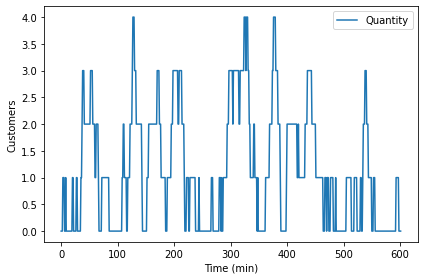

In [71]:
system = make_system(lam, mu)
run_simulation(system, update_func2)
results2.plot()
decorate(xlabel='Time (min)', ylabel='Customers')
# 



# system = make_system(lam, mu)
# results2 = run_simulation(system, update_func2)
# results2.plot()
# decorate(xlabel='Time (min)', ylabel='Customers')
L, W = compute_metrics(results2, system)
print('interarrival_time=',interarrival_time)
print('service_time=',service_time)
print('Average number of customers in queue=',round(L,1))
print('Average wait time in queue=', round(W,1), 'mins')

In [72]:
"""
Since we have two checkout counters now, we can consider values for  λ  that exceed  μ .
Create a new array of values for lam from 10% to 160% of mu.
"""
lam_array = linspace(0.1*mu, 2.6*mu, num_vals)

In [73]:
sweep = sweep_lam(lam_array, mu, update_func2)
W_avg = sweep.mean()
print('Average of averages = ', W_avg, 'minutes')

Time
0      0
1      0
2      0
3      0
4      0
      ..
597    0
598    0
599    0
600    0
601    0
Name: Quantity, Length: 602, dtype: int64
Time
0      0
1      0
2      0
3      0
4      0
      ..
597    0
598    0
599    0
600    0
601    0
Name: Quantity, Length: 602, dtype: int64
Time
0      0
1      0
2      0
3      0
4      0
      ..
597    0
598    0
599    0
600    0
601    0
Name: Quantity, Length: 602, dtype: int64
Time
0      0
1      0
2      0
3      0
4      0
      ..
597    0
598    0
599    0
600    0
601    0
Name: Quantity, Length: 602, dtype: int64
Time
0      0
1      0
2      0
3      0
4      0
      ..
597    0
598    0
599    0
600    1
601    2
Name: Quantity, Length: 602, dtype: int64
Time
0      0
1      0
2      0
3      0
4      0
      ..
597    1
598    1
599    0
600    0
601    0
Name: Quantity, Length: 602, dtype: int64
Time
0      0
1      0
2      0
3      0
4      0
      ..
597    0
598    0
599    0
600    0
601    0
Name: Quantity, Leng

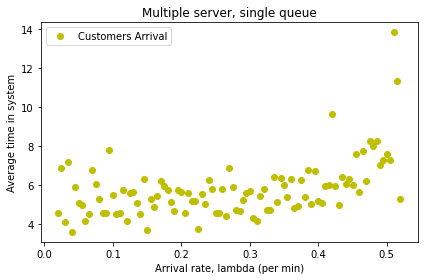

In [74]:
plot_sweep(sweep)
decorate(xlabel='Arrival rate, lambda (per min)',
         ylabel='Average time in system',
         title='Multiple server, single queue')

In [75]:
def update_func3(x1, x2, t, system):
    """Simulate two queues with one server each.
    
    x1: number of customers in queue 1
    x2: number of customers in queue 2
    t: time step
    system: System object
    """
    # if the first servers is busy, check it it's done
    if x1 > 0 and flip(system.mu):
        x1 -= 1
            
    # if the second queue is busy, check if it's done
    if x2 > 0 and flip(system.mu):
        x2 -= 1
            
    # check for an arrival
    if flip(system.lam):
        # join whichever queue is shorter
        if x1 < x2:
            x1 += 1
        else:
            x2 += 1
            
    return x1, x2

In [76]:
def run_simulation(system, update_func):
    """Simulate a queueing system.
    
    system: System object
    update_func: function object
    """
    x1, x2 = 0, 0
    results = TimeSeries()
    results[0] = x1 + x2
    
    for t in linrange(0, system.duration):
        x1, x2 = update_func(x1, x2, t, system)
        results[t+1] = x1 + x2

    return results

(0.6196013289036545, 4.956810631229236)

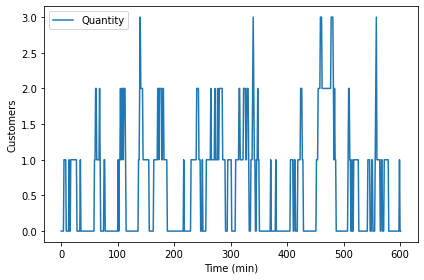

In [77]:
system = make_system(lam, mu)
results3 =run_simulation(system, update_func3)
results3.plot()
decorate(xlabel='Time (min)', ylabel='Customers')
compute_metrics(results3, system)

In [78]:
sweep = sweep_lam(lam_array, mu, update_func3)
W_avg = sweep.mean()
print('Average of averages = ', W_avg, 'minutes')

Average of averages =  18.87981083812399 minutes


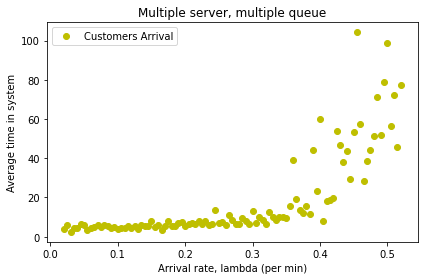

In [81]:
# W_array = 1 / (mu - lam_array)
# W_series = make_series(lam_array, W_array)
# W_series.plot(style='-', label='analysis')
# # plot_W(lam_array, mu)
plot_sweep(sweep)

decorate(xlabel='Arrival rate, lambda (per min)',
         ylabel='Average time in system',
         title='Multiple server, multiple queue')